In [1]:
import make_dataset_v02 as md
import manipulate_image as mi
import manipulate_dataset as mp
from IPython.display import display, clear_output
from pycsi import MyConfigs
import matplotlib.pyplot as plt
import numpy as np

Setting camera stream...Done
Loading CSI...
CSI npy load start... Wed Feb  7 14:20:32 2024
loaded
scaled
Removing sm...Done
CSI (186643, 30, 3, 3) load complete Wed Feb  7 14:21:24 2024
Loading label...Done
CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done
Starting exporting image...


  0%|          | 0/5400 [00:00<?, ?it/s]

Calibrating camera time against local time file...Done
lag=-0.06508312516742283
Masking...


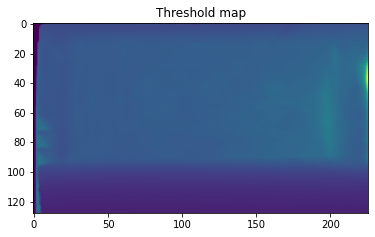

  0%|          | 0/5400 [00:00<?, ?it/s]

Done
Starting exporting CSI...


  0%|          | 0/5400 [00:00<?, ?it/s]

Deopverlapping...Done
Slicing...Done
Aligning...Done
Saving...Done
Setting camera stream...Done
Loading CSI...
CSI npy load start... Wed Feb  7 14:58:02 2024
loaded
scaled
Removing sm...Done
CSI (178280, 30, 3, 3) load complete Wed Feb  7 14:58:52 2024
Loading label...Done
CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done
Starting exporting image...


  0%|          | 0/5000 [00:00<?, ?it/s]

Calibrating camera time against local time file...Done
lag=-0.10003251504898071
Masking...


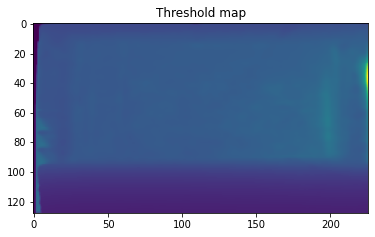

  0%|          | 0/5000 [00:00<?, ?it/s]

Done
Starting exporting CSI...


  0%|          | 0/5000 [00:00<?, ?it/s]

Deopverlapping...Done
Slicing...Done
Aligning...Done
Saving...Done
Setting camera stream...Done
Loading CSI...
CSI npy load start... Wed Feb  7 15:32:07 2024
loaded
scaled
Removing sm...Done
CSI (173802, 30, 3, 3) load complete Wed Feb  7 15:32:56 2024
Loading label...Done
CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done
Starting exporting image...


  0%|          | 0/5100 [00:00<?, ?it/s]

Calibrating camera time against local time file...Done
lag=-0.13225088638417862
Masking...


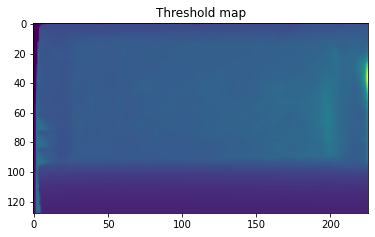

  0%|          | 0/5100 [00:00<?, ?it/s]

Done
Starting exporting CSI...


  0%|          | 0/5100 [00:00<?, ?it/s]

Deopverlapping...Done
Slicing...Done
Aligning...Done
Saving...Done
Setting camera stream...Done
Loading CSI...
CSI npy load start... Wed Feb  7 16:06:28 2024
loaded
scaled
Removing sm...Done
CSI (211747, 30, 3, 3) load complete Wed Feb  7 16:07:38 2024
Loading label...Done
CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done
Starting exporting image...


  0%|          | 0/5100 [00:00<?, ?it/s]

Calibrating camera time against local time file...Done
lag=-0.09882854569192026
Masking...


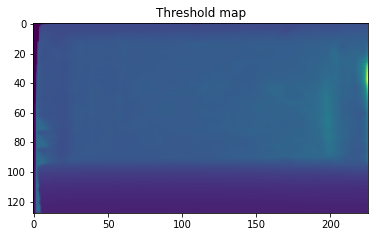

  0%|          | 0/5100 [00:00<?, ?it/s]

Done
Starting exporting CSI...


  0%|          | 0/5100 [00:00<?, ?it/s]

Deopverlapping...Done
Slicing...Done
Aligning...Done
Saving...Done


In [3]:
%matplotlib inline
date = '0509'
make = 14

subs = [
    ('01', 5400),
    ('02', 5000),
    ('03', 5100), 
    ('04', 5100)]

configs = MyConfigs()
configs.tx_rate = 0x1c113
configs.ntx = 3

for (sub, length) in subs:

    path = {'bag': f"../sense/{date}/{sub}.bag",
            'localtime': f"../sense/{date}/{sub}_timestamps.txt",
            'csi': f"../npsave/{date}/{date}A{sub}-csio.npy",  
            'label': f"../sense/{date}/{sub}_labels.csv",
            'save': f"../dataset/0509/{make}",
           }

    mkdata = md.MyDataMakerV02(csi_configs=configs, img_size=(226, 128), paths=path, total_frames=length, csi_length=30, assemble_number=1)
    mkdata.jupyter = True
    mkdata.csi.extract_dynamic(mode='overall-divide', ref='tx', ref_antenna=1)
    mkdata.csi.extract_dynamic(mode='highpass')
    mkdata.export_image(show_img=False)
    mkdata.depth_mask(0.7)
    mkdata.export_csi(window_dynamic=False, pick_tx=0)
    mkdata.deoverlap()
    mkdata.slice_by_label()
    mkdata.assemble()
    #mkdata.playback_image()
    mkdata.save_dataset(sub + '_dyn', 'annotated', 'img', 'csi', 'time', 'ind', 'label')

Setting camera stream...Done
Loading CSI...
CSI npy load start... Tue Feb  6 14:06:46 2024
loaded
scaled
Removing sm...Done
CSI (178280, 30, 3, 3) load complete Tue Feb  6 14:07:34 2024
Loading label...Done


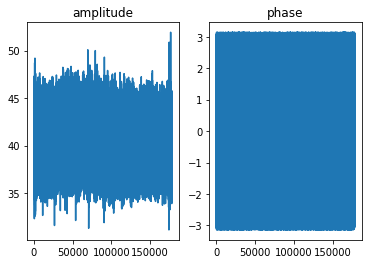

CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done


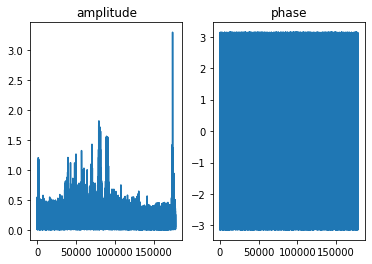

Setting camera stream...Done
Loading CSI...
CSI npy load start... Tue Feb  6 14:08:40 2024
loaded
scaled
Removing sm...Done
CSI (186643, 30, 3, 3) load complete Tue Feb  6 14:09:31 2024
Loading label...Done


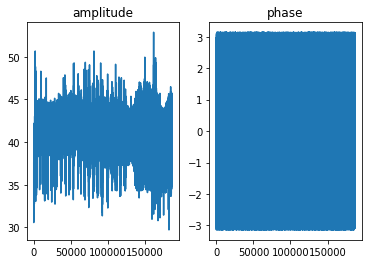

CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done


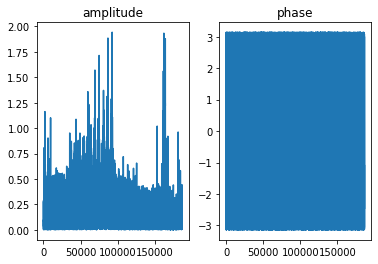

Setting camera stream...Done
Loading CSI...
CSI npy load start... Tue Feb  6 14:10:15 2024
loaded
scaled
Removing sm...Done
CSI (173802, 30, 3, 3) load complete Tue Feb  6 14:11:02 2024
Loading label...Done


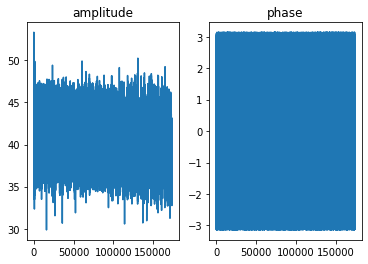

CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done


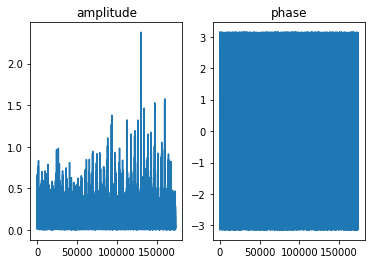

Setting camera stream...Done
Loading CSI...
CSI npy load start... Tue Feb  6 14:12:09 2024
loaded
scaled
Removing sm...Done
CSI (211747, 30, 3, 3) load complete Tue Feb  6 14:13:05 2024
Loading label...Done


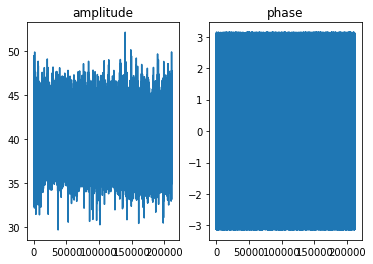

CSI apply dynamic component extraction: overall-divide versus tx1...Done
CSI apply dynamic component extraction: highpass versus rx0...Done


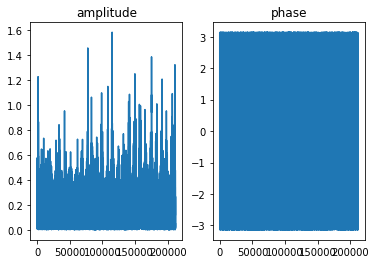

In [3]:
%matplotlib inline
date = '0509'

subs = [('02', 5000),
       ('01', 5400),
        ('03', 5100), ('04', 5100)]

configs = MyConfigs()
configs.tx_rate = 0x1c113
configs.ntx = 3

for (sub, length) in subs:

    path = {'bag': f"../sense/{date}/{sub}.bag",
            'localtime': f"../sense/{date}/{sub}_timestamps.txt",
            'csi': f"../npsave/{date}/{date}A{sub}-csio.npy",  
            'label': f"../sense/{date}/{sub}_labels.csv",
            'save': '../dataset/0509/make13',
           }

    mkdata = md.MyDataMaker(csi_configs=configs, paths=path, total_frames=length, csi_length=100, assemble_number=1)
    mkdata.jupyter = True

    fig = plt.figure()
    ax = fig.subplots(1, 2)
    ax = ax.flatten()
    ax[0].plot(np.abs(mkdata.csi.csi[:, 0, 0, 0]))
    ax[0].set_title('amplitude')
    ax[1].plot(np.angle(mkdata.csi.csi[:, 0, 0, 0]))
    ax[1].set_title('phase')
    plt.show()
    
    mkdata.csi.extract_dynamic(mode='overall-divide', ref='tx', ref_antenna=1)
    mkdata.csi.extract_dynamic(mode='highpass')

    fig = plt.figure()
    ax = fig.subplots(1, 2)
    ax = ax.flatten()
    ax[0].plot(np.abs(mkdata.csi.csi[:, 0, 0, 0]))
    ax[0].set_title('amplitude')
    ax[1].plot(np.angle(mkdata.csi.csi[:, 0, 0, 0]))
    ax[1].set_title('phase')
    plt.show()
    

In [ ]:
try:
    for i in range(50):
        print(format(mkdata.result['annotated']['time'][0][0][i], '.6f'))
except Exception:
    pass
print(mkdata.result['annotated']['csi'][0].shape)
print(mkdata.frames)

In [4]:
names = ('01', '02', '03', '04')
for name in names:
    print(name)  
    gen = mi.ImageGen(name)
    gen.load_images(f"../dataset/0509/make14/{name}_dyn_asmb1_len30_img.npy")
    gen.bounding_box(min_area=0, show=False)
    gen.align_to_center(unified_size=True)
    #gen.print_len()
    gen.save('../dataset/0509/make14-resize/', save_terms=('raw_bbx', 'gen_img'))
    #gen.view_generation()

01
Loading images...
Loaded img of (2479, 1, 128, 226) as float64
Labeling bounding boxes...Complete!
Starting exporting image...


100% 2479/2479 [02:21<00:00, 17.48it/s]


Generation complete!
Saved raw_bbx
Saved gen_img
02
Loading images...
Loaded img of (3083, 1, 128, 226) as float64
Labeling bounding boxes...Complete!
Starting exporting image...


100% 3083/3083 [03:39<00:00, 14.04it/s]


Generation complete!
Saved raw_bbx
Saved gen_img
03
Loading images...
Loaded img of (2456, 1, 128, 226) as float64
Labeling bounding boxes...Complete!
Starting exporting image...


100% 2456/2456 [02:18<00:00, 17.68it/s]


Generation complete!
Saved raw_bbx
Saved gen_img
04
Loading images...
Loaded img of (2972, 1, 128, 226) as float64
Labeling bounding boxes...Complete!
Starting exporting image...


100% 2972/2972 [03:23<00:00, 14.63it/s]


Generation complete!
Saved raw_bbx
Saved gen_img


Loaded file of (10990, 2, 90, 100) as float64


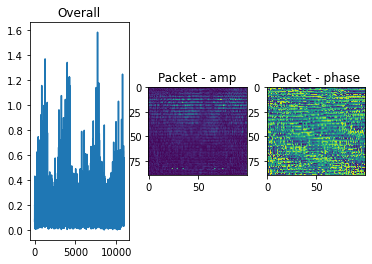

In [5]:
viewer = mp.DataViewer('../dataset/0509/make06-finished/csi.npy')
viewer.view_csi()

Loaded file of (10990, 2, 90, 100) as float64
Calculating aoa...Done!
Calculating tof...Done!


/home/bob/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


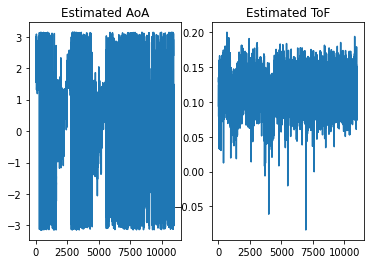

In [2]:
phasediff = mp.PhaseDiff('../dataset/0509/make06-finished/csi.npy', '../dataset/0509/make06-finished/')
phasediff.svd('aoa')
phasediff.svd('tof')
phasediff.view()

In [8]:
pd = np.concatenate((phasediff.result['AoA'][..., np.newaxis], phasediff.result['ToF'][..., np.newaxis]), axis=1)
print(pd.shape)

(10990, 2)
